In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

In [4]:
cols = ["arch", "activation", "attack", "iterations", "eps 2", "eps 4", "eps 6", "eps 8", "eps 10", "SROCC"]
data = pd.read_csv("rs/results.csv", header=0, usecols=cols)

In [5]:
data.sample(5, random_state=0)

,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
7,vonenet50,relu,IFGSM,1,0.007687,0.022841,0.027502,0.036149,0.034650,0.858145
2,resnet50,relu,IFGSM,1,0.031039,0.042287,0.045907,0.046951,0.047501,0.907343
1,resnet34,relu,IFGSM,1,0.038686,0.058012,0.068479,0.074239,0.077611,0.901809
4,resnet50,relu_silu,IFGSM,1,0.024537,0.031912,0.033811,0.033910,0.034243,0.907033
8,resnet50,Frelu_silu,IFGSM,1,0.020747,0.031766,0.036907,0.041441,0.047813,0.881869


In [6]:
fsilu_data = data[(data["arch"]=="resnet50")&(data["activation"]=="Fsilu")].loc[:,"eps 2": "eps 10"].values
print(fsilu_data[0][0],fsilu_data[-1])

0.0401130945003344 [0.04011309 0.06670947 0.09172539 0.11778046 0.14579967]


In [9]:
group1 = [("resnet18", "relu"), ("resnet34", "relu"), ("resnet50", "relu"), ("wideresnet50", "relu")]
group2 = [("resnet50", "relu"), ("resnet50", "silu"), ("resnet50", "relu_silu"),("resnet50", "Frelu_silu") ]
group3 = [("wideresnet50", "relu"),("vonenet50", "relu")]

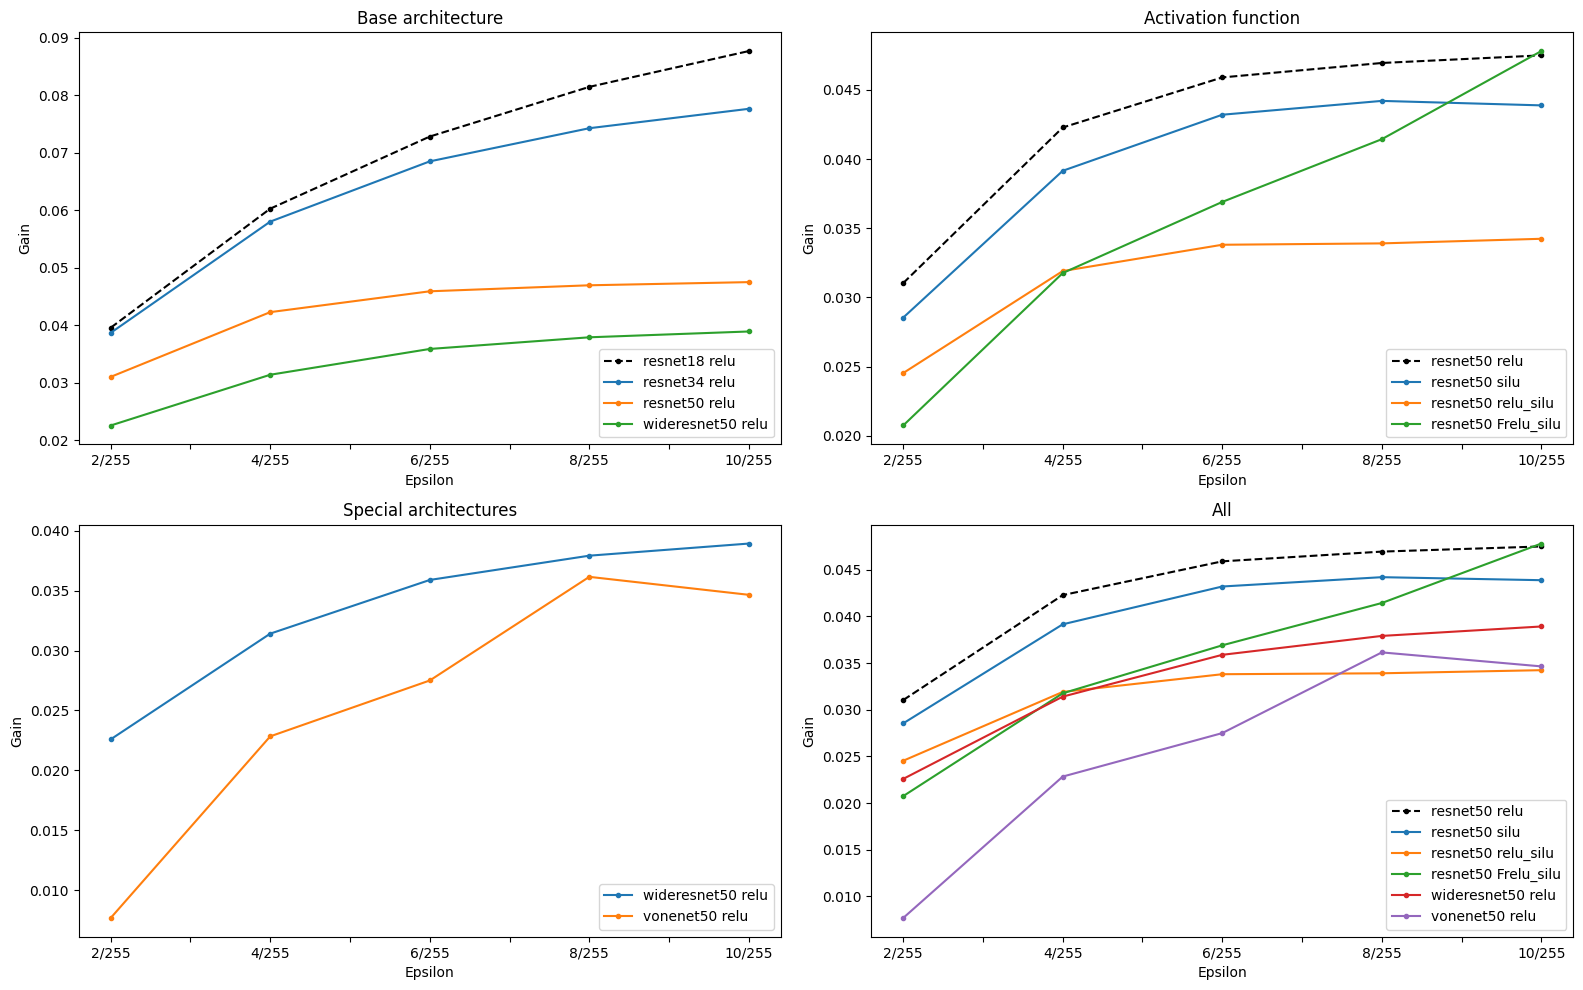

In [14]:
group = group2 + group3
groups = [group1, group2, group3, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']

fig, axs = plt.subplots(2,2, figsize=(16,10), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18','relu'),('resnet50','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("All")
fig.tight_layout()

# axs[0,1].set_ylim(fsilu_data[0][1], fsilu_data[0][-1])

for i in range(4):
    axis = axs[i//2, i%2]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="lower right")

plt.show()
fig.savefig('graph4.png')


In [15]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3)
df = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df.loc[len(df)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': format(np.trapz(y_axis, x), '.2f')}
df.sort_values('result').style.hide()

architecture,activation,SROCC,result
vonenet50,relu,0.86,0.22
resnet50,relu_silu,0.91,0.26
wideresnet50,relu,0.91,0.27
resnet50,Frelu_silu,0.88,0.29
resnet50,silu,0.90,0.33
resnet50,relu,0.91,0.35
resnet34,relu,0.90,0.52
resnet18,relu,0.90,0.56


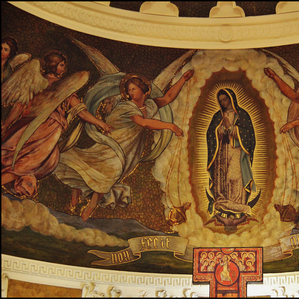

In [97]:
from PIL import Image
from torchvision.transforms.functional import resize
im10 = Image.open('./NIPS_test/4a0bac33f8e81e60.png').convert('RGB')

# im1 = resize(im, (96, 128))
im10

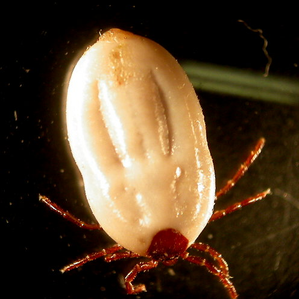

In [98]:
im20 = Image.open('./NIPS_test/7506caf0a49c3951.png').convert('RGB')
im20

In [99]:
from torchvision.transforms.functional import to_tensor, normalize
import torchvision.transforms as T
import numpy as np

alpha = 0.8

im1_, im2_ = to_tensor(im10), to_tensor(im20)
im1,im2 = normalize(im1_, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),normalize(im2_, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
index = [2,1,0]


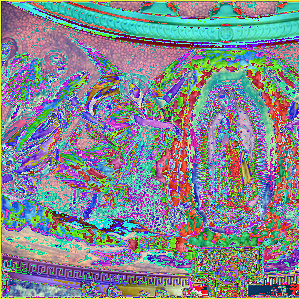

In [100]:
# im = normalize(im, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
lam = np.random.beta(alpha, alpha)
im = (1-lam)*im1 + lam*im2
transform = T.ToPILImage()
transform(im)

In [88]:
lam

0.6820064865537923